In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd


In [55]:
df = pd.read_csv('worldometer_data.csv')
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [49]:
df.count

<bound method DataFrame.count of             Country/Region      Continent    Population  TotalCases  NewCases  \
0                      USA  North America  3.311981e+08     5032179       NaN   
1                   Brazil  South America  2.127107e+08     2917562       NaN   
2                    India           Asia  1.381345e+09     2025409       NaN   
3                   Russia         Europe  1.459409e+08      871894       NaN   
4             South Africa         Africa  5.938157e+07      538184       NaN   
..                     ...            ...           ...         ...       ...   
204             Montserrat  North America  4.992000e+03          13       NaN   
205  Caribbean Netherlands  North America  2.624700e+04          13       NaN   
206       Falkland Islands  South America  3.489000e+03          13       NaN   
207           Vatican City         Europe  8.010000e+02          12       NaN   
208         Western Sahara         Africa  5.986820e+05          10       Na

In [50]:
len(df)

209

In [18]:
df.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [56]:
df.rename(columns={'Country/Region':"country",
                  'TotalCases':'confirmed',
                   'TotalRecovered':'recovered',
                   'ActiveCases':'active',
                   'TotalDeaths':'deaths'
                  },inplace=True)

In [57]:
df.columns

Index(['country', 'Continent', 'Population', 'confirmed', 'NewCases', 'deaths',
       'NewDeaths', 'recovered', 'NewRecovered', 'active', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'WHO Region'],
      dtype='object')

In [61]:
df = df[['country','confirmed','active','deaths','recovered']]

In [62]:
df.dropna(inplace=True)

In [64]:
len(df)

184

In [65]:
df = df.sort_values(by='confirmed',ascending=False)

In [67]:
df.head()

,country,confirmed,active,deaths,recovered
0,USA,5032179,2292707.0,162804.0,2576668.0
1,Brazil,2917562,771258.0,98644.0,2047660.0
2,India,2025409,606387.0,41638.0,1377384.0
3,Russia,871894,180931.0,14606.0,676357.0
4,South Africa,538184,141264.0,9604.0,387316.0


In [68]:
top_df = df[1:10] #top 10 countries

In [70]:
print(top_df)

         country  confirmed    active   deaths  recovered
1         Brazil    2917562  771258.0  98644.0  2047660.0
2          India    2025409  606387.0  41638.0  1377384.0
3         Russia     871894  180931.0  14606.0   676357.0
4   South Africa     538184  141264.0   9604.0   387316.0
5         Mexico     462690  103325.0  50517.0   308848.0
6           Peru     455409  124648.0  20424.0   310337.0
7          Chile     366671   16614.0   9889.0   340168.0
8       Colombia     357710  153416.0  11939.0   192355.0
10          Iran     320117   24678.0  17976.0   277463.0


In [71]:
x = top_df.country
y1 = top_df.confirmed
y2 = top_df.active
y3 = top_df.deaths
y4 = top_df.recovered

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

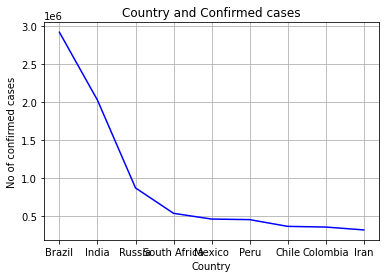

In [78]:
plt.plot(x,y1,color='blue')
# plt.xticks(rotation=90)
plt.title("Country and Confirmed cases")
plt.xlabel("Country")
plt.ylabel("No of confirmed cases")
plt.grid()
plt.show()

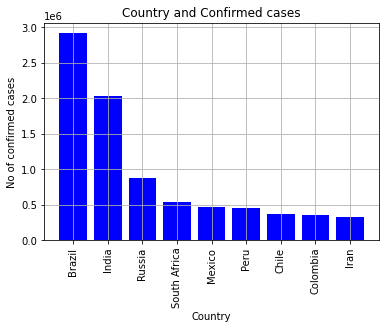

In [81]:
plt.bar(x,y1,color='blue')
plt.xticks(rotation=90)
plt.title("Country and Confirmed cases")
plt.xlabel("Country")
plt.ylabel("No of confirmed cases")
plt.grid()
plt.showplt.plt

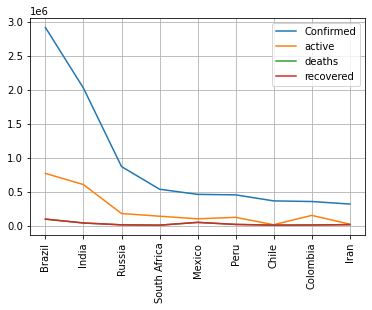

In [88]:
plt.plot(x,y1,label="Confirmed")
plt.plot(x,y2,label="active")
plt.plot(x,y3,label="deaths")
plt.plot(x,y3,label="recovered")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.grid()
plt.show()

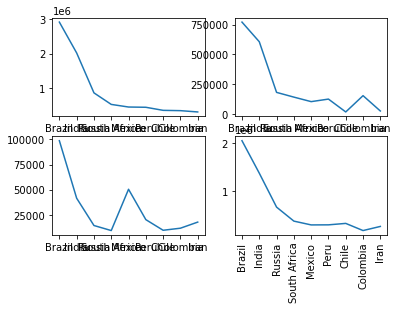

In [93]:
fig,ax = plt.subplots(2,2)
ax[0,0].plot(x,y1)
ax[0,1].plot(x,y2)
ax[1,0].plot(x,y3)
ax[1,1].plot(x,y4)
plt.xticks(rotation=90)
plt.show()

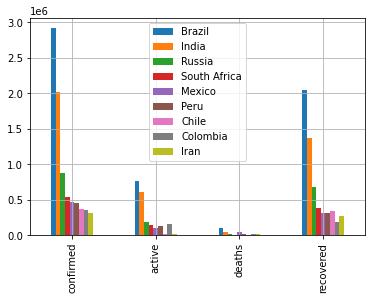

In [96]:
df = pd.DataFrame([y1,y2,y3,y4])
df.plot.bar()
plt.legend(x,loc='upper center')
plt.xticks(rotation=90)
plt.grid()
plt.show()


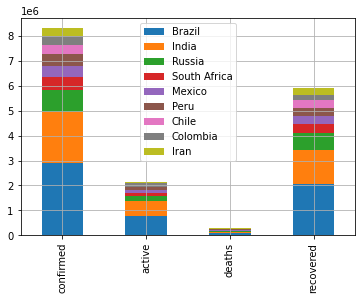

In [98]:
df.plot.bar(stacked=True)
plt.legend(x,loc='upper center')
plt.xticks(rotation=90)
plt.grid()
plt.show()

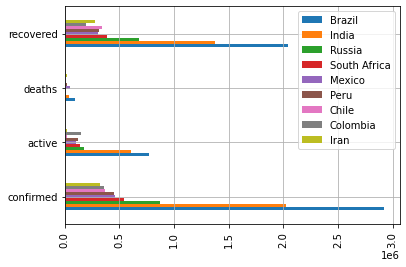

In [101]:
df.plot.barh()
plt.legend(x,loc='upper right')
plt.xticks(rotation=90)
plt.grid()
plt.show()

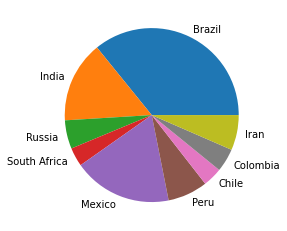

In [114]:
plt.pie(y3,labels=x)
# plt.legend(x,loc='upper center')
# plt.xticks(rotation=90)
# plt.grid()
plt.show()